# Sentiment Analysis on McDonald's Store Reviews


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import pandas as pd
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
#get data
data=pd.read_csv("/content/McDonald_s_Reviews.csv", encoding='latin-1') # or 'cp1252' or 'iso-8859-1'

In [4]:
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [5]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'rating' column
data["rating_encoded"] = label_encoder.fit_transform(data["rating"])

# Display the encoded values
print(data[["rating", "rating_encoded"]])

        rating  rating_encoded
0       1 star               0
1      4 stars               3
2       1 star               0
3      5 stars               4
4       1 star               0
...        ...             ...
33391   1 star               0
33392  5 stars               4
33393  4 stars               3
33394  5 stars               4
33395  5 stars               4

[33396 rows x 2 columns]


In [6]:

# Clean text
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words("english"))  # Remove stopwords
    tokens = word_tokenize(text)
    text = " ".join([word for word in tokens if word not in stop_words])
    return text

data["cleaned_review"] = data["review"].apply(clean_text)

# Encode labels
def encode_sentiment(rating):

    if rating <= 1:
        return "Negative"
    elif rating == 2:
        return "Neutral"
    else:
        return "Positive"

data["sentiment"] = data["rating_encoded"].apply(encode_sentiment)

# Display cleaned data
print(data[["review", "cleaned_review", "rating", "sentiment"]].head())

                                              review  \
0  Why does it look like someone spit on my food?...   
1  It'd McDonalds. It is what it is as far as the...   
2  Made a mobile order got to the speaker and che...   
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...   
4  I repeat my order 3 times in the drive thru, a...   

                                      cleaned_review   rating sentiment  
0  look like someone spit food normal transaction...   1 star  Negative  
1  itd mcdonalds far food atmosphere go staff mak...  4 stars  Positive  
2  made mobile order got speaker checked line mov...   1 star  Negative  
3  mc crispy chicken sandwich customer service qu...  5 stars  Positive  
4  repeat order times drive thru still manage mes...   1 star  Negative  


In [7]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(data["cleaned_review"]).toarray()
y = data["sentiment"]

In [8]:
#Split the data into training and testing sets.
#Train a model (e.g., Logistic Regression).
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.813622754491018
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.88      0.85      2543
     Neutral       0.70      0.33      0.45       939
    Positive       0.83      0.90      0.86      3198

    accuracy                           0.81      6680
   macro avg       0.78      0.71      0.72      6680
weighted avg       0.80      0.81      0.80      6680



<ipython-input-9-a9335fc11d07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["sentiment"], palette="viridis")


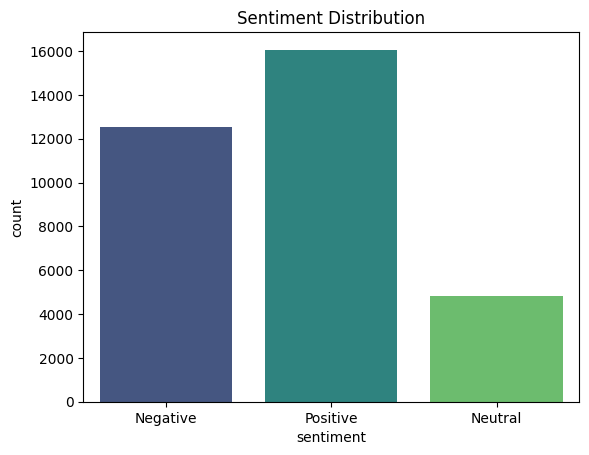

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x=data["sentiment"], palette="viridis")
plt.title("Sentiment Distribution")
plt.show()